In [1]:
### importing the datasets
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
url = 'E:/Assignments/train.csv'
train = pd.read_csv(url)


In [3]:
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [4]:
url = 'E:/Assignments/test.csv'
test = pd.read_csv(url)

In [5]:
test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [6]:
### getting the information on train dataset & test dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    12980 non-null  object 
 1   season      12980 non-null  int64  
 2   holiday     12980 non-null  int64  
 3   workingday  12980 non-null  int64  
 4   weather     12980 non-null  int64  
 5   temp        12980 non-null  float64
 6   atemp       12980 non-null  float64
 7   humidity    12980 non-null  float64
 8   windspeed   12980 non-null  float64
 9   casual      12980 non-null  int64  
 10  registered  12980 non-null  int64  
 11  count       12980 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 1.2+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4399 entries, 0 to 4398
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    4399 non-null   object 
 1   season      4399 non-null   int64  
 2   holiday     4399 non-null   int64  
 3   workingday  4399 non-null   int64  
 4   weather     4399 non-null   int64  
 5   temp        4399 non-null   float64
 6   atemp       4399 non-null   float64
 7   humidity    4399 non-null   float64
 8   windspeed   4399 non-null   float64
 9   casual      4399 non-null   int64  
 10  registered  4399 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 378.2+ KB


In [8]:
train.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


#### -- Performing the EDA --

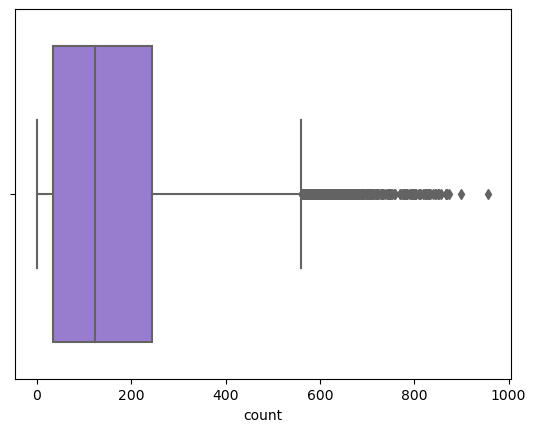

In [9]:
sns.boxplot(x='count', data=train, color='mediumpurple')
plt.show()
#### most of the data fall between 30 adn 300 and huge number of outliers are present after 600.

C:\Users\Hp\AppData\Local\Temp\ipykernel_18028\853670113.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['count'], bins =100,color ='green')


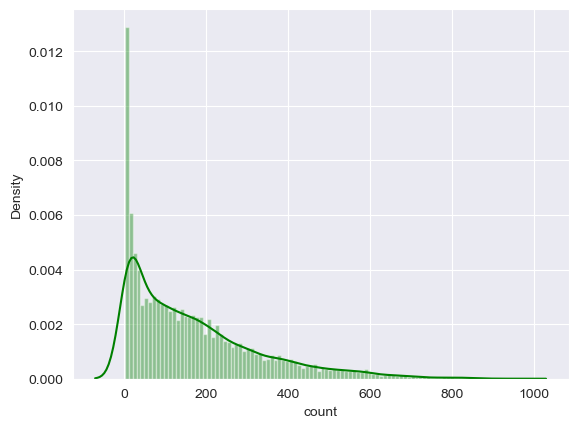

In [10]:
### Histogram
sns.set_style('darkgrid')
sns.distplot(train['count'], bins =100,color ='green')
plt.show()

['temp', 'atemp', 'humidity', 'windspeed']


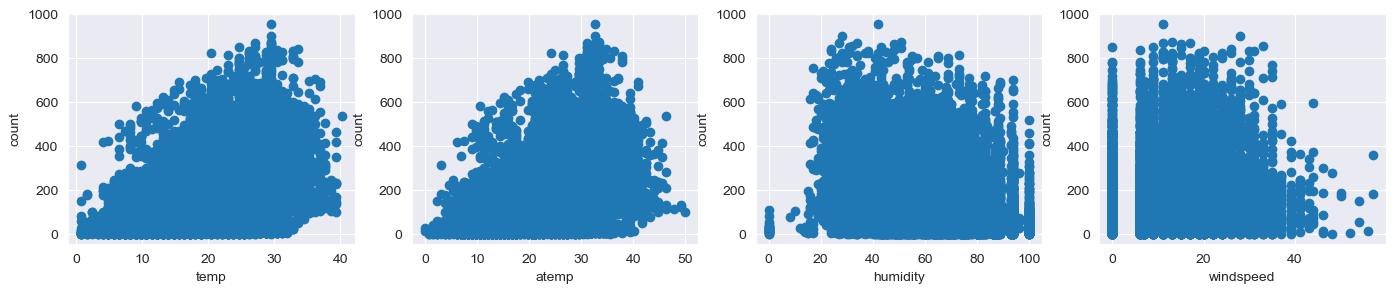

In [11]:
### scatter plot between count  and each numeric features
### using scatter plot because of numeric features

fields = [f for f in train]
fields = fields[5:-3]
print (fields)

fig = plt.figure(figsize = (17,3))

for i,f in enumerate(fields):
    ax = fig.add_subplot(1,4,i+1)
    ax.scatter(train[f],train['count'])
    ax.set_ylabel('count')
    ax.set_xlabel(f)
    
plt.show()
    

[Text(0.5, 0, 'weather'), Text(0, 0.5, 'count')]

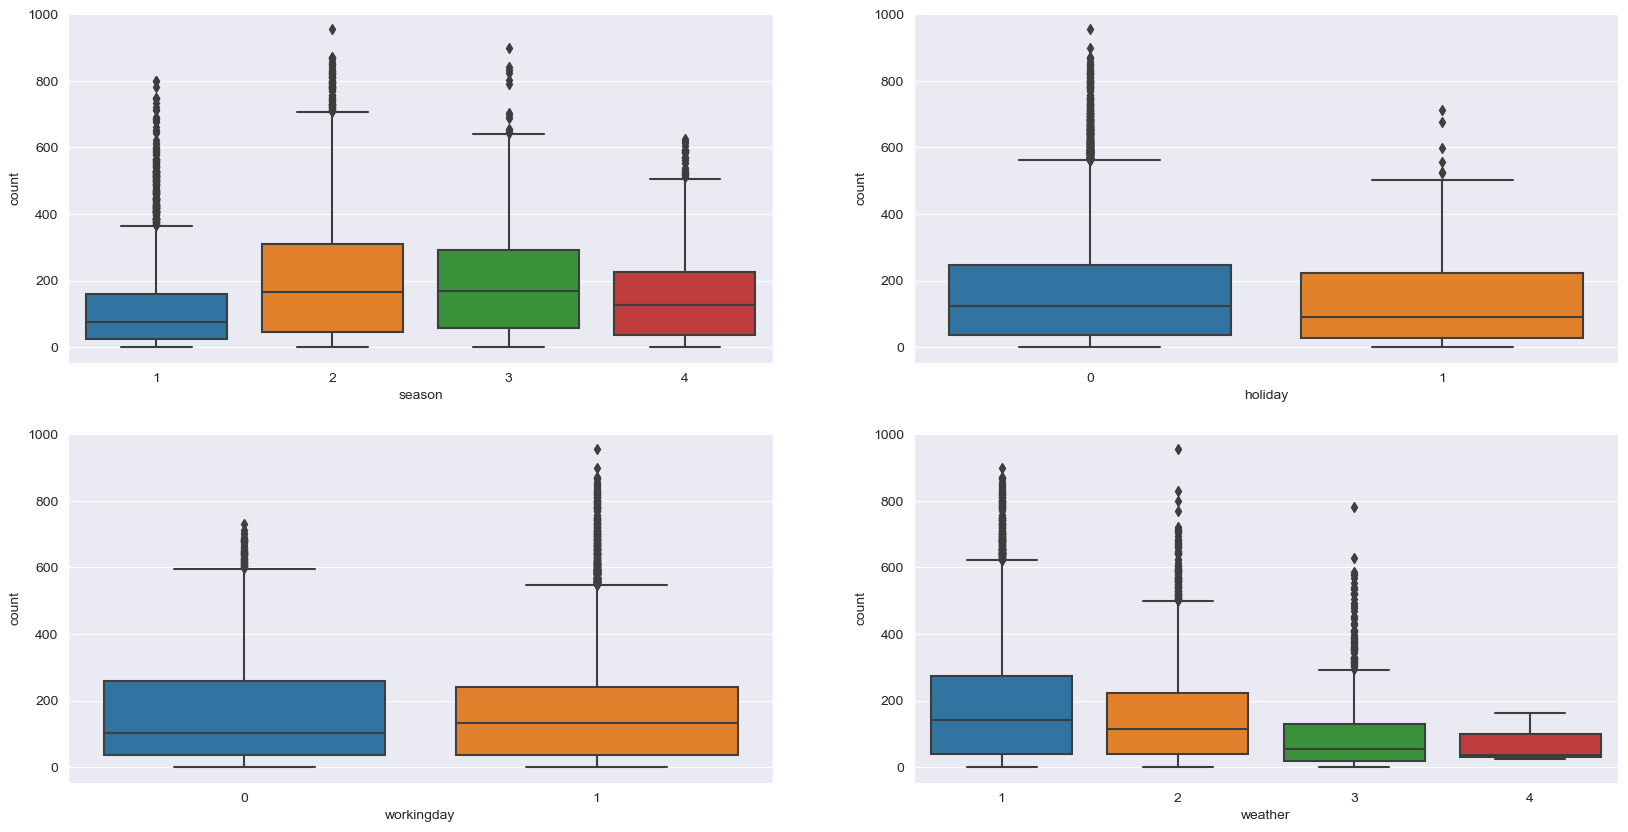

In [12]:
#### boxplot between count and each categorical features
fig,axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,10)

sns.boxplot(data=train, y='count', x='season', ax=axes[0][0])
sns.boxplot(data=train, y='count', x='holiday', ax=axes[0][1])
sns.boxplot(data=train, y='count', x='workingday', ax=axes[1][0])
sns.boxplot(data=train, y='count', x='weather', ax=axes[1][1])

axes[0][0].set(xlabel='season', ylabel='count')
axes[0][1].set(xlabel='holiday', ylabel='count')
axes[1][0].set(xlabel='workingday', ylabel='count')
axes[1][1].set(xlabel='weather', ylabel='count')

In [13]:
### correlation betwwen each features., whether numeric or categorical are correlated to our target variable 'count'

plt.figure(figsize=(10,10))
sns.heatmap(train.corr('pearson'), vmin=-1, vmax=1, cmap='coolwarm', annot=True, square=True)

ValueError: could not convert string to float: '2011-01-01 0:00:00'

<Figure size 1000x1000 with 0 Axes>

In [14]:
### Converting datetime to each elements (year, month, day, dayofweek, hour)
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [15]:
### splitting datetime to year, month, day, dayofweek, hour
def split_datetime(df):
    df['year']=df['datetime'].apply(lambda t:t.year)
    df['month']=df['datetime'].apply(lambda t:t.month)
    df['day']=df['datetime'].apply(lambda t:t.day)
    df['dayofweek']=df['datetime'].apply(lambda t:t.dayofweek)
    df['hour']=df['datetime'].apply(lambda t:t.hour)
    df=df.drop(['datetime'],axis=1)
    return df

In [16]:
train=split_datetime(train)
test=split_datetime(test)
train=train.drop(['casual','registered'], axis = 1)
train.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81.0,0.0,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80.0,0.0,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80.0,0.0,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75.0,0.0,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75.0,0.0,1,2011,1,1,5,4


<Axes: xlabel='hour', ylabel='count'>

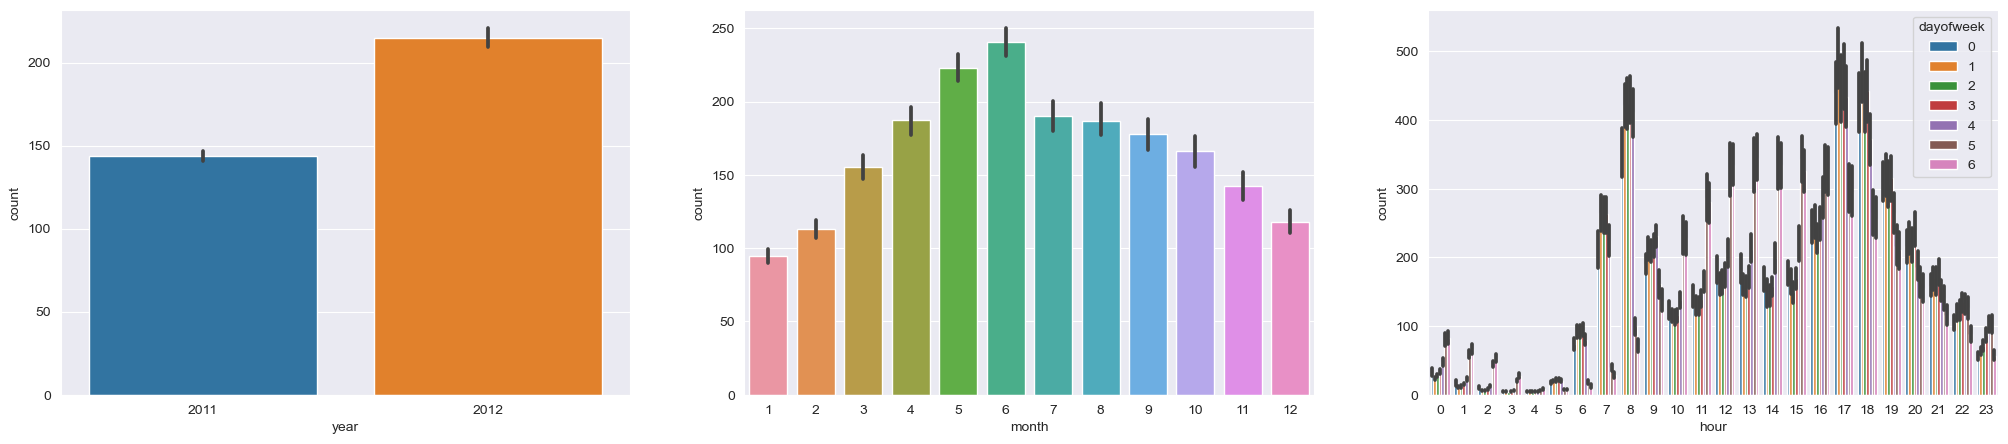

In [17]:
#### barplot between count and each categorical features
fig,axes=plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(25,5)
sns.barplot(data=train, x='year', y='count', ax=axes[0])
sns.barplot(data=train, x='month', y='count', ax=axes[1])
sns.barplot(data=train, x='hour', y='count', ax=axes[2], hue='dayofweek')

### 2012 -more bikesharing rentals, June month - high number of bike rentals, hour - morning and evening high bike rentals


C:\Users\Hp\AppData\Local\Temp\ipykernel_18028\1298751210.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['count'])


<Axes: xlabel='count', ylabel='Density'>

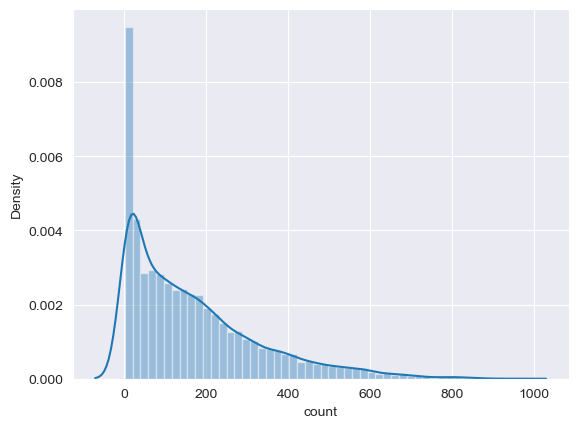

In [18]:
sns.distplot(train['count'])

In [19]:
### taking log function for count col.
train['count']=np.log1p(train['count'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_18028\3650674742.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['count'])


<Axes: xlabel='count', ylabel='Density'>

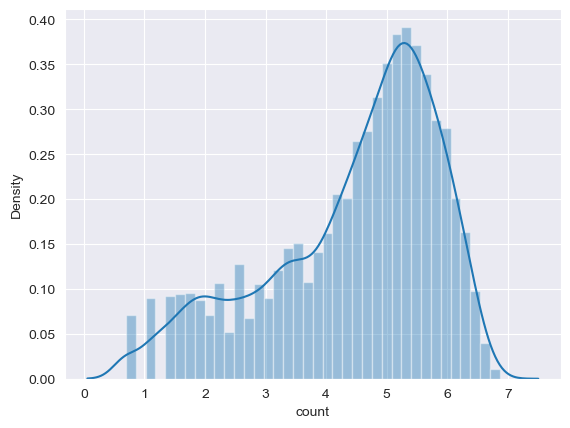

In [20]:
### checking after removing skewness from the count col.
sns.distplot(train['count'])

In [21]:
### eliminating the outliers with residual less tha stdev*3 bcos 99% of data is present in SD*3
train = train[np.abs(train['count'])-train['count'].mean()<=3*train['count'].std()]

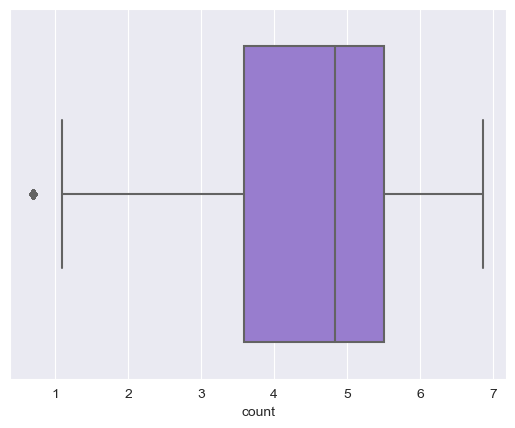

In [22]:
#### plot of count
sns.boxplot(x='count', data=train, color='mediumpurple')
plt.show()


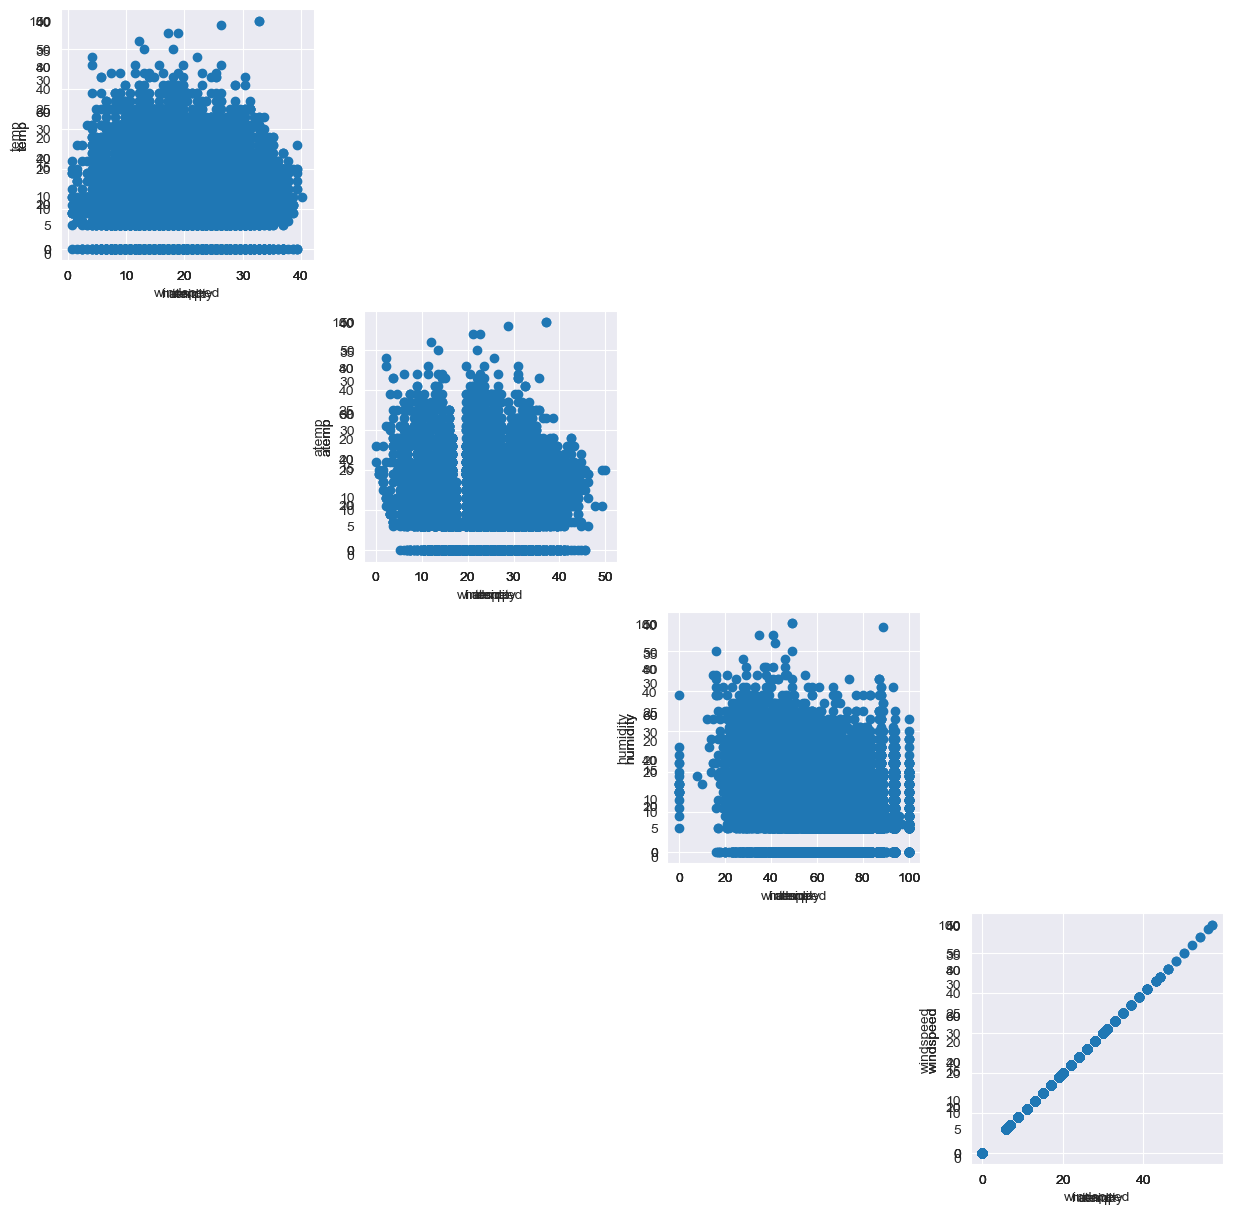

In [23]:
#### eliminating outliers between correlations(features)
fig=plt.figure(figsize=(15,15))

for i,f1 in enumerate(fields):
    for j,f2 in enumerate (fields):
        idx=i*len(fields)+i+1
        ax=fig.add_subplot(len(fields),len(fields),idx)
        ax.scatter(train[f1],train[f2])
        ax.set_ylabel(f1)
        ax.set_xlabel(f2)
        
plt.show()

In [24]:
drop_idx=train[(train['atemp']>20) & (train['atemp']<40) & (train['temp']>10) & (train['temp']<20)].index
train=train.drop(drop_idx)

In [25]:
### Standard Scaling numeric columns into a particular range  -- using MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
def scaling(df):    #### creating function to scale the numeric values into MinMax values.Passing the dataframe as the parameter
    scaler=MinMaxScaler()
    num_cols=['temp','atemp','humidity','windspeed']  #### specifying the numeric cols as a list 
    df[num_cols]=scaler.fit_transform(df[num_cols]) # applying the MinMaxScaler on these cols. 
                                                    #### fit_transform to apply the MinMaxScaler to these cols.
    return df

In [26]:
### applying the above function to our train/test dataset
train=scaling(train)
test=scaling(test)


In [27]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,0.229167,0.2879,0.81,0.0,2.833213,2011,1,1,5,0
1,1,0,0,1,0.208333,0.2727,0.80,0.0,3.713572,2011,1,1,5,1
2,1,0,0,1,0.208333,0.2727,0.80,0.0,3.496508,2011,1,1,5,2
3,1,0,0,1,0.229167,0.2879,0.75,0.0,2.639057,2011,1,1,5,3
4,1,0,0,1,0.229167,0.2879,0.75,0.0,0.693147,2011,1,1,5,4


In [28]:
### Split train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train.drop(['count'],axis=1),train['count'],test_size=0.3)

In [29]:
def rmsle(y,pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y-log_pred)**2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install lightgbm

#### Choosing the model

In [32]:
#### importing all the models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV

In [33]:
### params=parameter Creating the frunction
def evaluate(reg_cls,params=None):
    reg=reg_cls()
    if params:
        reg=GridSearchCV(reg,param_grid=params,refit=True)
    reg.fit(X_train,y_train)
    pred=reg.predict(X_test)
    
    y_test_exp=np.expm1(y_test)
    pred_exp=np.expm1(pred)
    print('\n',reg_cls)
    if params:
        print(reg.best_params_)
        reg=reg.best_estimator_
    print(rmsle(y_test_exp, pred_exp))
    return reg,pred_exp

In [34]:
#### applying the function -- lr=linearregressor, pred_lr=predicted linear regressor
lr_reg,pred_lr=evaluate(LinearRegression)
rg_reg,pred_rg=evaluate(Ridge)
ls_reg,pred_ls=evaluate(Lasso)
rf_reg,pred_rf=evaluate(RandomForestRegressor)
gb_reg,pred_gb=evaluate(GradientBoostingRegressor)
xg_reg,pred_xg=evaluate(XGBRegressor)
lg_reg,pred_lg=evaluate(LGBMRegressor)

params={'n_estimators':[100*i for i in range(1,6)]}
xg_reg,pred_xg=evaluate(XGBRegressor,params)
lg_reg,pred_lg=evaluate(LGBMRegressor,params)



 <class 'sklearn.linear_model._base.LinearRegression'>
1.0044182723406614

 <class 'sklearn.linear_model._ridge.Ridge'>
1.004533732155596

 <class 'sklearn.linear_model._coordinate_descent.Lasso'>
1.1578002056178898

 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.32262731915604226

 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
0.40948895793383905

 <class 'xgboost.sklearn.XGBRegressor'>
0.3026016620446644
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 297
[LightGBM] [Info] Number of data points in the train set: 7690, number of used features: 13
[LightGBM] [Info] Start training from score 4.442705

 <class 'lightgbm.sklearn.LGBMRegressor'>
0.29744239796651595

 <class 'xgboost.sklearn.XGBRegressor'>
{'n_estimators': 100}
0.3026016620446644
[LightGBM] [Info

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 6152, number of used features: 13
[LightGBM] [Info] Start training from score 4.434966
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 6152, number of used features: 13
[LightGBM] [Info] Start training from score 4.450193
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 615

In [35]:
def feature_importance(reg):
    plt.figure(figsize=(20,10))
    print(type(reg))
    df=pd.DataFrame(sorted(zip(X_train.columns,reg.feature_importances_)),columns=['features','values'])
    sns.barplot(x='values',y='features',data=df.sort_values(by='values',ascending=False))
    plt.show()

<class 'xgboost.sklearn.XGBRegressor'>


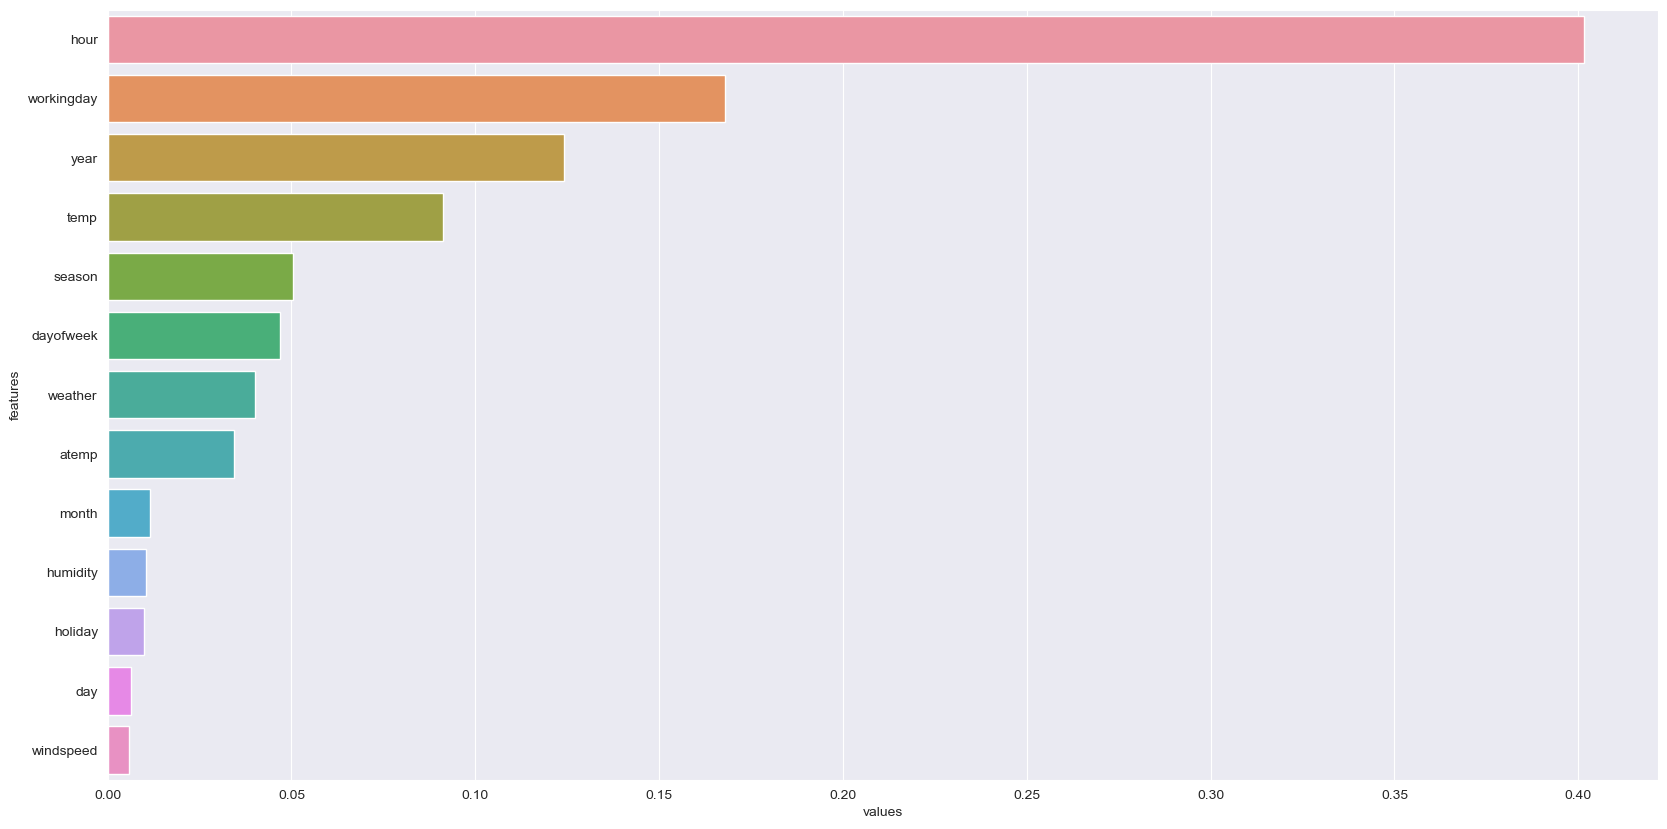

In [36]:
feature_importance(xg_reg)

<class 'lightgbm.sklearn.LGBMRegressor'>


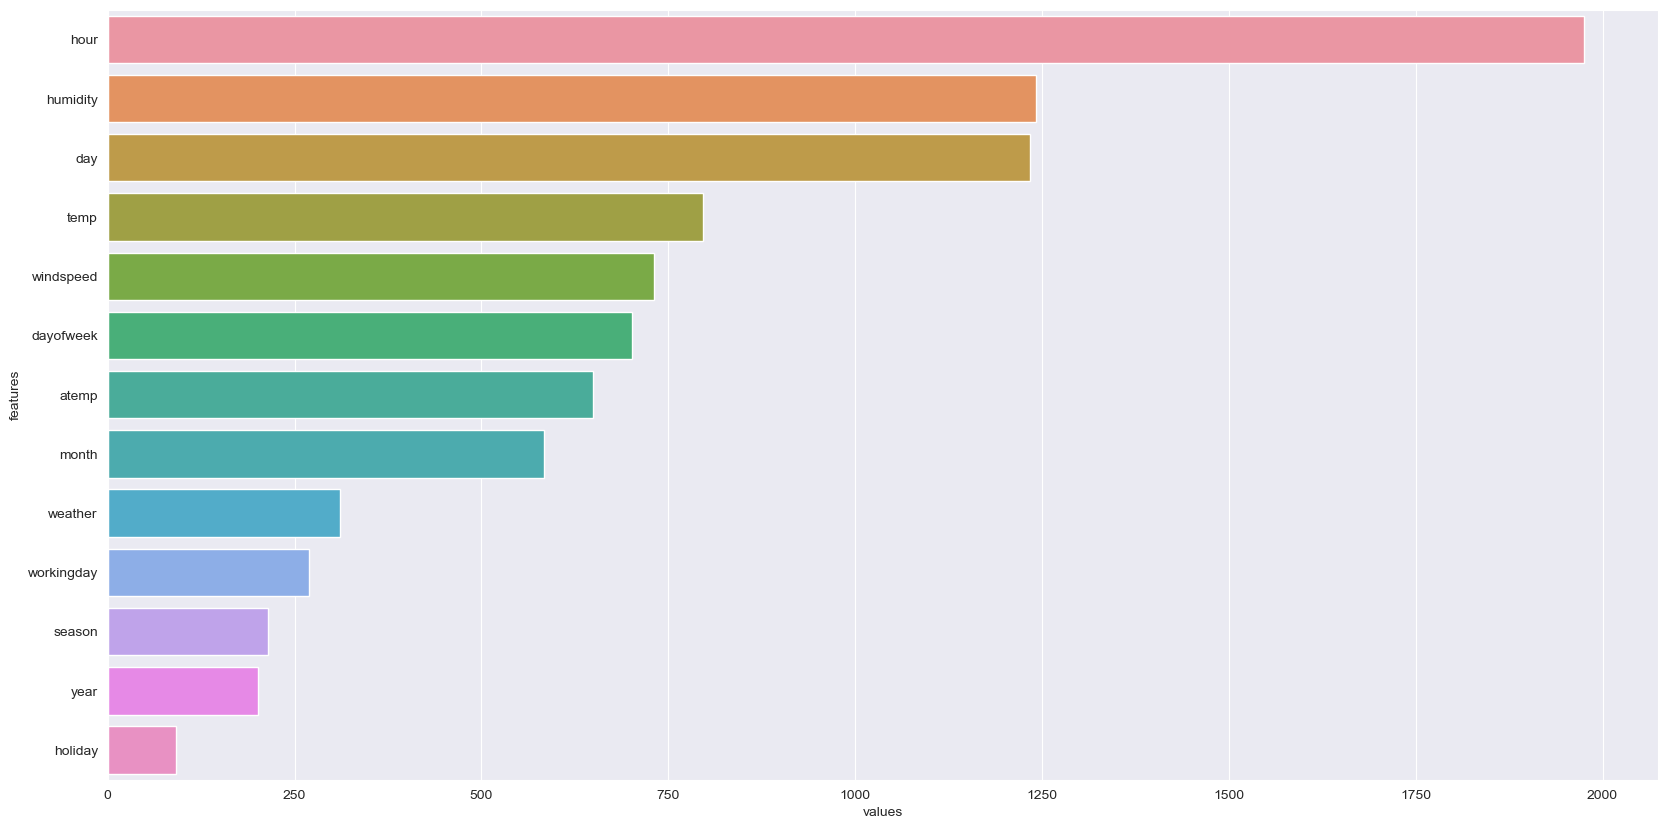

In [37]:
feature_importance(lg_reg)

In [38]:
submission=pd.read_csv('E:/Assignments/test.csv')
submission.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [39]:
test.shape

(4399, 15)

In [40]:
# pred=xg_reg.predict(test)
pred=lg_reg.predict(test)
pred_exp=np.expm1(pred)
print(pred_exp)

ValueError: Number of features of the model must match the input. Model n_features_ is 13 and input n_features is 15